Limpieza de datos:
1. Identificación de valores faltantes y atípicos
2. Imputación de valores
3. Clasificación de variables


In [3]:
install.packages("pacman")
library(pacman)
p_load(tidyverse,tidymodels)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘Rcpp’, ‘diagram’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘warp’, ‘iterators’, ‘lhs’, ‘DiceDesign’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘foreach’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’



tidymodels installed



In [68]:
train_hogares <- read.csv('/content/train_hogares_1.csv')
test_hogares <- read.csv('/content/test_hogares_1.csv')
train_personas <- read.csv('/content/train_personas_1.csv')
test_personas <- read.csv('/content/test_personas_1.csv')


In [69]:
train_hogares <- train_hogares %>% select(-X)
test_hogares <- test_hogares %>% select(-X)
train_personas <- train_personas %>% select(-X)
test_personas <- test_personas %>% select(-X)

*Bases* de datos - **test_hogares**



Análisis de valores nulos

Variables categóricas

In [32]:
lista_var_hog_train_categ <- c('Clase','Propiedad','Pobre','Indigente')

In [33]:
sum(is.na(train_hogares[,lista_var_hog_train_categ]))

[1] 0

Variables discretas

In [34]:
lista_var_hog_train_discre  <- c('cuartos','cuartosHab','Nper','Npersug')

In [35]:
sum(is.na(train_hogares[,lista_var_hog_train_discre]))

[1] 0

Variables continuas

Revisión de la variable de amortización y su relación con el arriendo estimado

In [36]:
revis_Amort<-train_hogares %>% filter(Propiedad==2)
glimpse(revis_Amort)

Rows: 5,626
Columns: 18
$ id          <chr> "de481fbdb1ae55bc7aa2f172", "5abfb14a395fdca07eb06648", "3…
$ Clase       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Dominio     <chr> "MEDELLIN", "MEDELLIN", "MEDELLIN", "MEDELLIN", "MEDELLIN"…
$ cuartos     <int> 5, 5, 5, 4, 4, 5, 3, 4, 5, 7, 4, 4, 6, 4, 4, 5, 4, 4, 3, 3…
$ cuartosHab  <int> 4, 3, 2, 3, 3, 4, 2, 3, 1, 3, 2, 3, 2, 3, 1, 2, 2, 3, 2, 1…
$ Propiedad   <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2…
$ Amort       <dbl> 1100000, 2730000, 550000, 300000, 500000, 300000, 200000, …
$ ArriendoEst <dbl> 900000, 2000000, 800000, 500000, 400000, 400000, 400000, 8…
$ Arriendo    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ Nper        <int> 5, 4, 3, 4, 4, 5, 5, 6, 2, 4, 3, 4, 3, 5, 2, 3, 3, 4, 2, 1…
$ Npersug     <int> 3, 4, 3, 4, 4, 5, 5, 6, 2, 4, 3, 4, 3, 5, 2, 3, 3, 4, 2, 1…
$ Ingtotug    <dbl> 4775000, 13000000, 5516667, 3731247, 1114140, 3327807, 100…
$ Ingtotugarr <d

Si Amort es mayor a ArriendoEst, Ingtotugarr es igual a Ingtotug. Pero si Amort es menor a ArriendoEst, Ingtotugarr = Ingtotug + (ArriendoEst-Amort)

In [37]:
train_hogares <- train_hogares %>% replace(is.na(.), 0)

In [38]:
train_hogares<-train_hogares %>% mutate(resta_Amort_Arriendo = ArriendoEst-Amort)
train_hogares<-train_hogares %>% mutate(resta_Amort_Arriendo = case_when(resta_Amort_Arriendo<0  ~ 0,resta_Amort_Arriendo>=0 ~ resta_Amort_Arriendo))
glimpse(train_hogares)

Rows: 164,960
Columns: 19
$ id                   <chr> "8d0193e328305a042001a35f", "cf7491d7f2cc9c216bd0…
$ Clase                <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Dominio              <chr> "MEDELLIN", "MEDELLIN", "MEDELLIN", "MEDELLIN", "…
$ cuartos              <int> 4, 5, 4, 3, 4, 3, 4, 4, 4, 4, 1, 1, 4, 3, 3, 3, 3…
$ cuartosHab           <int> 2, 4, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 3, 1, 2, 1, 2…
$ Propiedad            <int> 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 4, 3…
$ Amort                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ ArriendoEst          <dbl> 400000, 0, 700000, 450000, 0, 400000, 700000, 750…
$ Arriendo             <dbl> 0, 250000, 0, 0, 500000, 0, 0, 0, 0, 270000, 3500…
$ Nper                 <int> 5, 4, 3, 1, 5, 3, 1, 4, 4, 2, 1, 1, 3, 2, 3, 1, 3…
$ Npersug              <int> 5, 4, 3, 1, 5, 3, 1, 4, 4, 2, 1, 1, 3, 2, 3, 1, 3…
$ Ingtotug             <dbl> 2508330.3, 645000.0, 5300000.0, 2000000.0, 126000…
$ Ingtotugarr 

In [39]:
revis_Amort<-train_hogares %>% filter(Propiedad==2)
glimpse(revis_Amort)

Rows: 5,626
Columns: 19
$ id                   <chr> "de481fbdb1ae55bc7aa2f172", "5abfb14a395fdca07eb0…
$ Clase                <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Dominio              <chr> "MEDELLIN", "MEDELLIN", "MEDELLIN", "MEDELLIN", "…
$ cuartos              <int> 5, 5, 5, 4, 4, 5, 3, 4, 5, 7, 4, 4, 6, 4, 4, 5, 4…
$ cuartosHab           <int> 4, 3, 2, 3, 3, 4, 2, 3, 1, 3, 2, 3, 2, 3, 1, 2, 2…
$ Propiedad            <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2…
$ Amort                <dbl> 1100000, 2730000, 550000, 300000, 500000, 300000,…
$ ArriendoEst          <dbl> 900000, 2000000, 800000, 500000, 400000, 400000, …
$ Arriendo             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Nper                 <int> 5, 4, 3, 4, 4, 5, 5, 6, 2, 4, 3, 4, 3, 5, 2, 3, 3…
$ Npersug              <int> 3, 4, 3, 4, 4, 5, 5, 6, 2, 4, 3, 4, 3, 5, 2, 3, 3…
$ Ingtotug             <dbl> 4775000, 13000000, 5516667, 3731247, 1114140, 332…
$ Ingtotugarr   

In [40]:
train_hogares <- train_hogares %>% mutate(ArriendoEst = resta_Amort_Arriendo)
train_hogares <- train_hogares %>% select(-resta_Amort_Arriendo,-Amort)
glimpse(train_hogares)

Rows: 164,960
Columns: 17
$ id          <chr> "8d0193e328305a042001a35f", "cf7491d7f2cc9c216bd009e7", "d…
$ Clase       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Dominio     <chr> "MEDELLIN", "MEDELLIN", "MEDELLIN", "MEDELLIN", "MEDELLIN"…
$ cuartos     <int> 4, 5, 4, 3, 4, 3, 4, 4, 4, 4, 1, 1, 4, 3, 3, 3, 3, 4, 4, 4…
$ cuartosHab  <int> 2, 4, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 3, 1, 2, 1, 2, 3, 1, 3…
$ Propiedad   <int> 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 4, 3, 1, 4, 1…
$ ArriendoEst <dbl> 400000, 0, 700000, 450000, 0, 400000, 700000, 750000, 6000…
$ Arriendo    <dbl> 0, 250000, 0, 0, 500000, 0, 0, 0, 0, 270000, 350000, 28000…
$ Nper        <int> 5, 4, 3, 1, 5, 3, 1, 4, 4, 2, 1, 1, 3, 2, 3, 1, 3, 5, 2, 3…
$ Npersug     <int> 5, 4, 3, 1, 5, 3, 1, 4, 4, 2, 1, 1, 3, 2, 3, 1, 3, 5, 2, 3…
$ Ingtotug    <dbl> 2508330.3, 645000.0, 5300000.0, 2000000.0, 1260000.0, 2372…
$ Ingtotugarr <dbl> 2908330.3, 645000.0, 6000000.0, 2450000.0, 1260000.0, 2772…
$ Ingpcug     

Exportación de base de datos - **train_hogares** con outliers

In [41]:
write.csv(train_hogares, file='train_hogares_2.csv', row.names = FALSE)

Valores atípicos

In [42]:
summary(train_hogares)

      id                Clase         Dominio             cuartos     
 Length:164960      Min.   :1.000   Length:164960      Min.   : 1.00  
 Class :character   1st Qu.:1.000   Class :character   1st Qu.: 3.00  
 Mode  :character   Median :1.000   Mode  :character   Median : 3.00  
                    Mean   :1.094                      Mean   : 3.39  
                    3rd Qu.:1.000                      3rd Qu.: 4.00  
                    Max.   :2.000                      Max.   :98.00  
   cuartosHab       Propiedad      ArriendoEst           Arriendo        
 Min.   : 1.000   Min.   :1.000   Min.   :        0   Min.   :        0  
 1st Qu.: 1.000   1st Qu.:1.000   1st Qu.:        0   1st Qu.:        0  
 Median : 2.000   Median :3.000   Median :    80000   Median :        0  
 Mean   : 1.989   Mean   :2.456   Mean   :   287240   Mean   :   171100  
 3rd Qu.: 3.000   3rd Qu.:3.000   3rd Qu.:   400000   3rd Qu.:   300000  
 Max.   :15.000   Max.   :6.000   Max.   :600000000   Max. 

Variables discretas

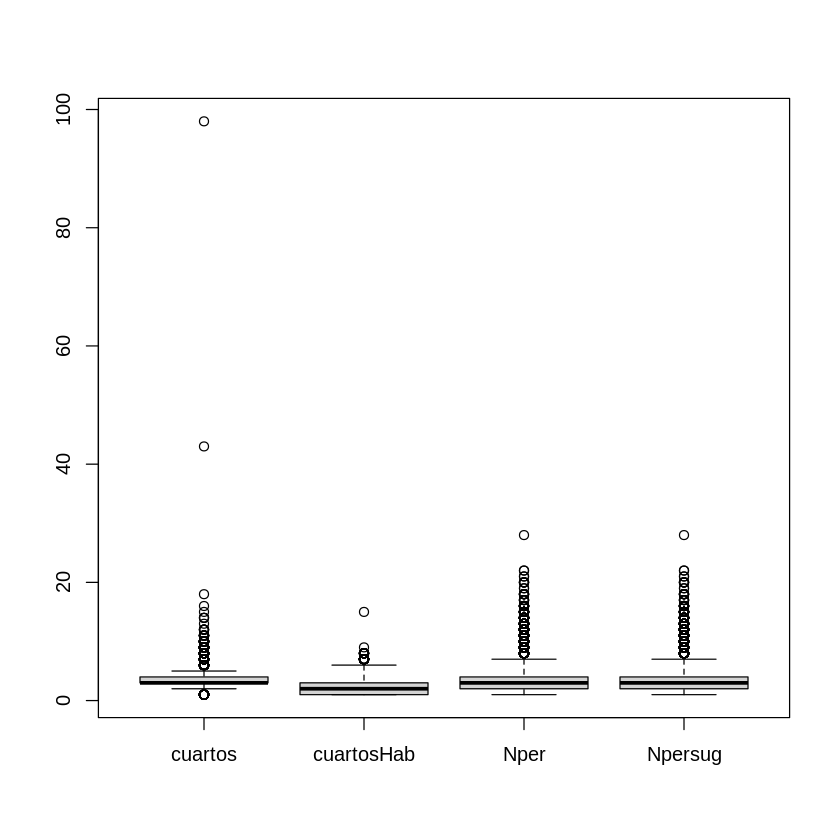

In [43]:
boxplot(train_hogares[,lista_var_hog_train_discre])

In [44]:
for (x in lista_var_hog_train_discre){

  value = train_hogares[,x][train_hogares[,x] %in% boxplot.stats(train_hogares[,x])$out]
  train_hogares[,x][train_hogares[,x] %in% value] = NA

}

In [45]:
summary(train_hogares[,lista_var_hog_train_discre])
glimpse(train_hogares[,lista_var_hog_train_discre])

    cuartos        cuartosHab         Nper          Npersug     
 Min.   :2.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:3.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :3.000   Median :2.000   Median :3.000   Median :3.000  
 Mean   :3.432   Mean   :1.987   Mean   :3.149   Mean   :3.137  
 3rd Qu.:4.000   3rd Qu.:3.000   3rd Qu.:4.000   3rd Qu.:4.000  
 Max.   :5.000   Max.   :6.000   Max.   :7.000   Max.   :7.000  
 NA's   :17716   NA's   :70      NA's   :3929    NA's   :3901   

Rows: 164,960
Columns: 4
$ cuartos    <int> 4, 5, 4, 3, 4, 3, 4, 4, 4, 4, NA, NA, 4, 3, 3, 3, 3, 4, 4, …
$ cuartosHab <int> 2, 4, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 3, 1, 2, 1, 2, 3, 1, 3,…
$ Nper       <int> 5, 4, 3, 1, 5, 3, 1, 4, 4, 2, 1, 1, 3, 2, 3, 1, 3, 5, 2, 3,…
$ Npersug    <int> 5, 4, 3, 1, 5, 3, 1, 4, 4, 2, 1, 1, 3, 2, 3, 1, 3, 5, 2, 3,…


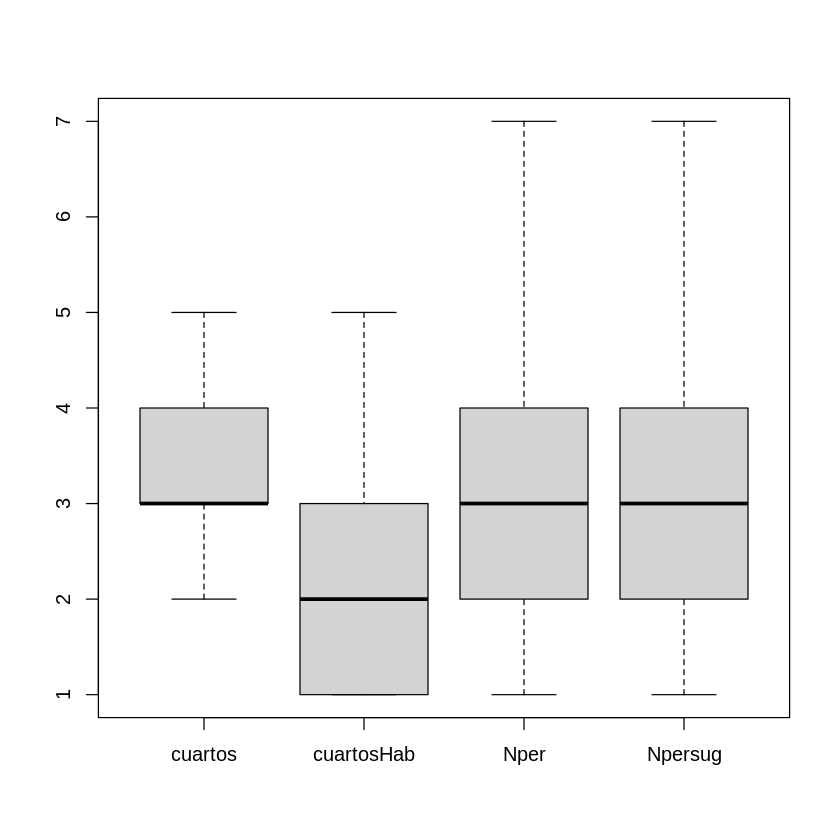

In [46]:
train_hogares <- train_hogares %>% drop_na()
boxplot(train_hogares[,lista_var_hog_train_discre])

Variables continuas

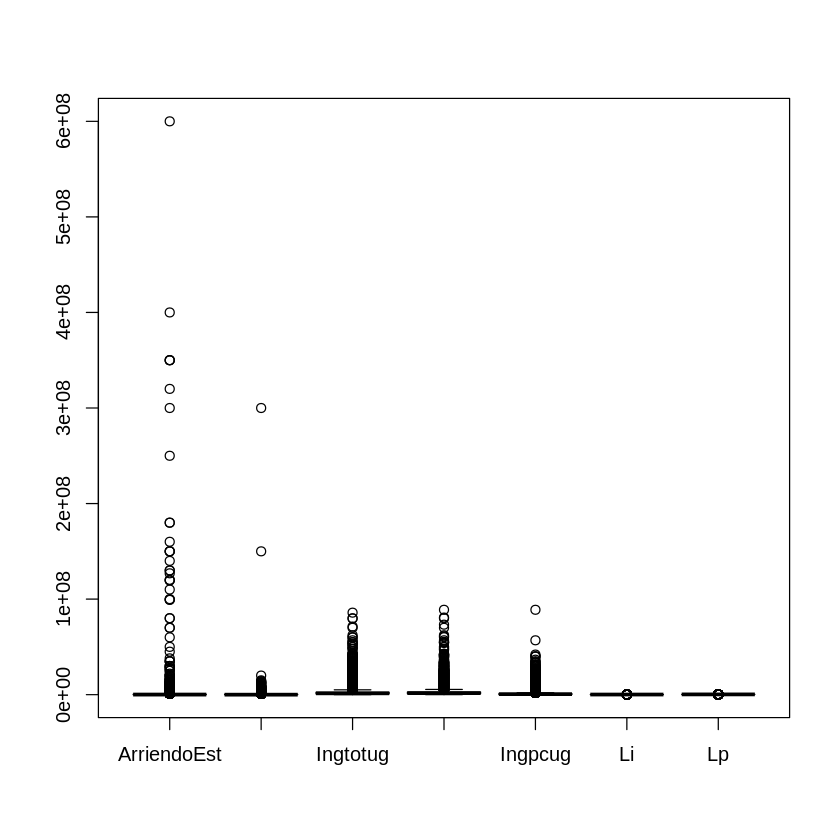

In [47]:
lista_var_hog_train_cont  <- c('ArriendoEst', 'Arriendo', 'Ingtotug', 'Ingtotugarr', 'Ingpcug', 'Li', 'Lp')
boxplot(train_hogares[,lista_var_hog_train_cont])

Rows: 107,884
Columns: 17
$ id          <chr> "8d0193e328305a042001a35f", "cf7491d7f2cc9c216bd009e7", "9…
$ Clase       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Dominio     <chr> "MEDELLIN", "MEDELLIN", "MEDELLIN", "MEDELLIN", "MEDELLIN"…
$ cuartos     <int> 4, 5, 4, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 4, 3, 2, 4, 3, 5…
$ cuartosHab  <int> 2, 4, 3, 2, 1, 3, 1, 2, 1, 2, 3, 1, 3, 1, 3, 2, 1, 3, 2, 4…
$ Propiedad   <int> 1, 3, 3, 1, 3, 1, 1, 3, 4, 3, 1, 4, 1, 3, 3, 3, 3, 1, 3, 1…
$ ArriendoEst <dbl> 400000, 0, 0, 400000, 0, 350000, 550000, 0, 650000, 0, 300…
$ Arriendo    <dbl> 0, 250000, 500000, 0, 270000, 0, 0, 700000, 0, 480000, 0, …
$ Nper        <int> 5, 4, 5, 3, 2, 3, 2, 3, 1, 3, 5, 2, 3, 2, 4, 3, 2, 5, 2, 5…
$ Npersug     <int> 5, 4, 5, 3, 2, 3, 2, 3, 1, 3, 5, 2, 3, 2, 4, 3, 2, 5, 2, 5…
$ Ingtotug    <dbl> 2508330.3, 645000.0, 1260000.0, 2372113.3, 1112306.7, 2140…
$ Ingtotugarr <dbl> 2908330.3, 645000.0, 1260000.0, 2772113.3, 1112306.7, 2490…
$ Ingpcug     

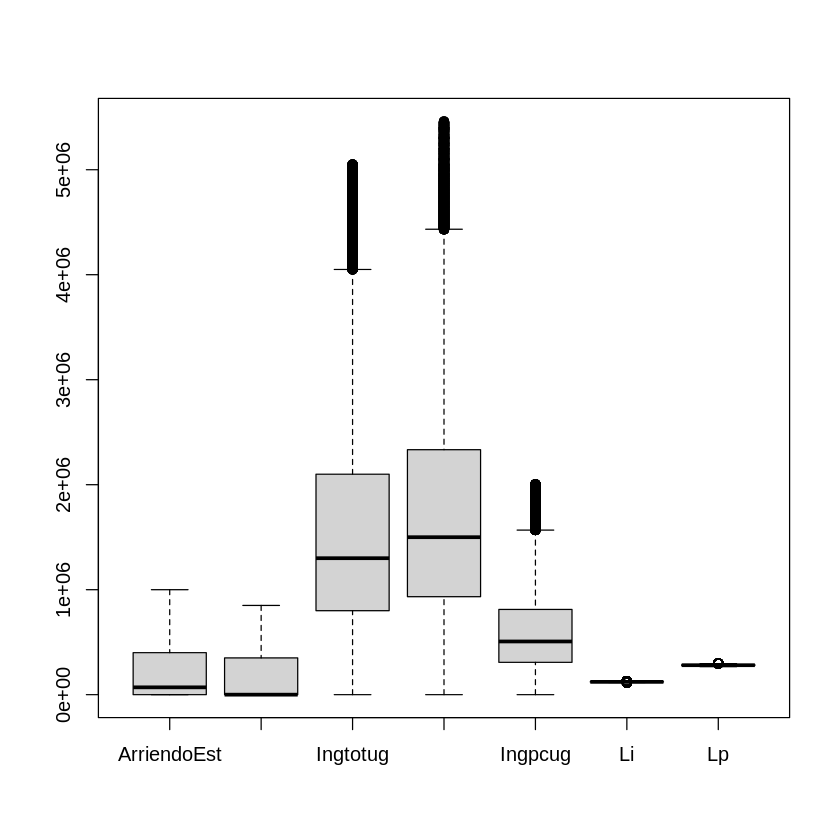

In [48]:
for (x in lista_var_hog_train_cont){

  value = train_hogares[,x][train_hogares[,x] %in% boxplot.stats(train_hogares[,x])$out]
  train_hogares[,x][train_hogares[,x] %in% value] = NA

}
train_hogares <- train_hogares %>% drop_na()
boxplot(train_hogares[,lista_var_hog_train_cont])
glimpse(train_hogares)


Exportación de base de datos - train_hogares sin outliers

In [49]:
write.csv(train_hogares, file='train_hogares_3.csv', row.names = FALSE)

Bases de datos - test_hogares

Análisis de valores nulos

Variables categóricas



In [51]:
lista_var_hog_test_categ <- c('Clase','Propiedad')
sum(is.na(test_hogares[,lista_var_hog_test_categ]))

[1] 0

Variables discretas

In [52]:
lista_var_hog_test_discre  <- c('cuartos','cuartosHab','Nper','Npersug')
sum(is.na(test_hogares[,lista_var_hog_test_discre]))

[1] 0

Variables continuas

In [53]:
revis_Amort_test<-test_hogares %>% filter(Propiedad==2)
glimpse(revis_Amort_test)

Rows: 2,138
Columns: 13
$ id          <chr> "212a37fc17016a3c78f76852", "15943ea1b6e932d6fb98f55d", "6…
$ Clase       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Dominio     <chr> "MEDELLIN", "MANIZALES", "ARMENIA", "RESTO URBANO", "POPAY…
$ cuartos     <int> 5, 4, 4, 6, 3, 4, 3, 3, 4, 2, 4, 2, 3, 6, 3, 5, 5, 6, 4, 4…
$ cuartosHab  <int> 2, 2, 3, 4, 1, 3, 2, 1, 3, 1, 3, 1, 2, 3, 2, 1, 4, 3, 2, 3…
$ Propiedad   <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2…
$ Amort       <dbl> 1800000, 800000, 400000, 357000, 232000, 600000, 150000, 8…
$ ArriendoEst <dbl> 2000000, 500000, 500000, 450000, 300000, 500000, 350000, 6…
$ Arriendo    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ Nper        <int> 2, 3, 4, 5, 2, 4, 4, 2, 5, 2, 4, 1, 3, 4, 4, 2, 5, 4, 3, 3…
$ Npersug     <int> 2, 3, 4, 5, 2, 4, 4, 2, 5, 2, 4, 1, 3, 4, 4, 2, 5, 4, 3, 3…
$ Li          <dbl> 123664.4, 120388.5, 121421.8, 120796.6, 124088.0, 124149.2…
$ Lp          <d

In [54]:
summary(test_hogares)

      id                Clase         Dominio             cuartos      
 Length:66168       Min.   :1.000   Length:66168       Min.   : 1.000  
 Class :character   1st Qu.:1.000   Class :character   1st Qu.: 3.000  
 Mode  :character   Median :1.000   Mode  :character   Median : 3.000  
                    Mean   :1.101                      Mean   : 3.407  
                    3rd Qu.:1.000                      3rd Qu.: 4.000  
                    Max.   :2.000                      Max.   :18.000  
                                                                       
   cuartosHab       Propiedad         Amort           ArriendoEst       
 Min.   : 1.000   Min.   :1.000   Min.   :      98   Min.   :       98  
 1st Qu.: 1.000   1st Qu.:1.000   1st Qu.:  280000   1st Qu.:   200000  
 Median : 2.000   Median :3.000   Median :  500000   Median :   350000  
 Mean   : 1.998   Mean   :2.469   Mean   :  716048   Mean   :   492701  
 3rd Qu.: 3.000   3rd Qu.:3.000   3rd Qu.:  821500   3rd Qu

In [55]:
test_hogares <- test_hogares %>% replace(is.na(.), 0)
test_hogares <- test_hogares %>% mutate(resta_Amort_Arriendo = ArriendoEst-Amort)
test_hogares <- test_hogares %>% mutate(resta_Amort_Arriendo = case_when(resta_Amort_Arriendo<0  ~ 0,resta_Amort_Arriendo>=0 ~ resta_Amort_Arriendo))
glimpse(test_hogares)

Rows: 66,168
Columns: 14
$ id                   <chr> "2a7ddc2779480d7f19834953", "a0c2e751e582fd49d564…
$ Clase                <int> 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1…
$ Dominio              <chr> "SANTA MARTA", "SANTA MARTA", "RURAL", "MEDELLIN"…
$ cuartos              <int> 4, 4, 3, 4, 5, 5, 4, 4, 4, 3, 3, 4, 4, 4, 3, 3, 4…
$ cuartosHab           <int> 3, 3, 1, 3, 2, 3, 2, 2, 3, 2, 2, 3, 1, 3, 1, 2, 2…
$ Propiedad            <int> 1, 4, 1, 1, 2, 1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 4, 3…
$ Amort                <dbl> 0, 0, 0, 0, 1800000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ ArriendoEst          <dbl> 400000, 500000, 250000, 600000, 2000000, 550000, …
$ Arriendo             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 900000, 500000, 0, 550000…
$ Nper                 <int> 5, 6, 2, 5, 2, 3, 3, 3, 3, 4, 4, 6, 1, 7, 3, 4, 3…
$ Npersug              <int> 5, 6, 2, 5, 2, 3, 3, 3, 3, 4, 4, 6, 1, 7, 3, 4, 3…
$ Li                   <dbl> 121449.45, 121449.45, 100763.34, 122251.78, 12366…
$ Lp           

In [56]:
test_hogares <- test_hogares %>% mutate(ArriendoEst = resta_Amort_Arriendo)
test_hogares <- test_hogares %>% select(-resta_Amort_Arriendo,-Amort)
glimpse(test_hogares)

Rows: 66,168
Columns: 12
$ id          <chr> "2a7ddc2779480d7f19834953", "a0c2e751e582fd49d564f308", "5…
$ Clase       <int> 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1…
$ Dominio     <chr> "SANTA MARTA", "SANTA MARTA", "RURAL", "MEDELLIN", "MEDELL…
$ cuartos     <int> 4, 4, 3, 4, 5, 5, 4, 4, 4, 3, 3, 4, 4, 4, 3, 3, 4, 3, 3, 6…
$ cuartosHab  <int> 3, 3, 1, 3, 2, 3, 2, 2, 3, 2, 2, 3, 1, 3, 1, 2, 2, 1, 1, 2…
$ Propiedad   <int> 1, 4, 1, 1, 2, 1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 4, 3, 1, 3, 4…
$ ArriendoEst <dbl> 400000, 500000, 250000, 600000, 200000, 550000, 350000, 65…
$ Arriendo    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 900000, 500000, 0, 550000, 0, 3500…
$ Nper        <int> 5, 6, 2, 5, 2, 3, 3, 3, 3, 4, 4, 6, 1, 7, 3, 4, 3, 2, 2, 2…
$ Npersug     <int> 5, 6, 2, 5, 2, 3, 3, 3, 3, 4, 4, 6, 1, 7, 3, 4, 3, 2, 2, 2…
$ Li          <dbl> 121449.45, 121449.45, 100763.34, 122251.78, 123664.36, 119…
$ Lp          <dbl> 275594.0, 275594.0, 170886.4, 294093.7, 293293.4, 283609.8…


In [ ]:
Exportación de base de datos - test_hogares con outliers

In [57]:
write.csv(test_hogares, file='test_hogares_2&3.csv', row.names = FALSE)

Limpieza - Base de datos **train_personas**




In [70]:
glimpse(train_personas)

Rows: 543,109
Columns: 26
$ id                 <chr> "8d0193e328305a042001a35f", "8d0193e328305a042001a3…
$ Sexo               <int> 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, …
$ Edad               <int> 38, 3, 41, 3, 11, 53, 34, 64, 60, 50, 71, 38, 43, 3…
$ JefeHogar          <int> 2, 3, 1, 3, 3, 5, 3, 1, 2, 2, 5, 1, 1, 4, 3, 4, 2, …
$ FormalSalud        <int> 1, NA, 1, NA, NA, 1, 1, 1, 1, 1, 1, 2, 1, NA, 1, NA…
$ SeguridadSocial    <int> 1, NA, 1, NA, NA, 3, 3, 1, 1, 1, 1, NA, 3, NA, 3, N…
$ maxEducLevel       <int> 3, 2, 5, 2, 4, 1, 1, 4, 3, 4, 3, 6, 3, 2, 6, NA, 3,…
$ relab              <int> 1, NA, 1, NA, NA, NA, NA, NA, NA, 4, NA, NA, 5, NA,…
$ SubsAlimen         <int> 2, NA, 2, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ SubsTrans          <int> 1, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ SubsFamil          <int> 1, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ SubsEducativo      <int> 2, NA, 2, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ Viaticos    

In [71]:
summary(train_personas)

      id                 Sexo            Edad          JefeHogar    
 Length:543109      Min.   :1.000   Min.   :  0.00   Min.   :1.000  
 Class :character   1st Qu.:1.000   1st Qu.: 16.00   1st Qu.:1.000  
 Mode  :character   Median :2.000   Median : 31.00   Median :3.000  
                    Mean   :1.529   Mean   : 33.55   Mean   :2.592  
                    3rd Qu.:2.000   3rd Qu.: 50.00   3rd Qu.:3.000  
                    Max.   :2.000   Max.   :110.00   Max.   :9.000  
                                                                    
  FormalSalud    SeguridadSocial   maxEducLevel       relab       
 Min.   :1.00    Min.   :1        Min.   :1.000   Min.   :1.00    
 1st Qu.:1.00    1st Qu.:1        1st Qu.:3.000   1st Qu.:1.00    
 Median :1.00    Median :2        Median :4.000   Median :4.00    
 Mean   :1.07    Mean   :2        Mean   :4.244   Mean   :2.91    
 3rd Qu.:1.00    3rd Qu.:3        3rd Qu.:5.000   3rd Qu.:4.00    
 Max.   :9.00    Max.   :9        Max.   :9.00

Variables categóricas

In [72]:
lista_var_pers_train_categ  <- c('Sexo', 'JefeHogar', 'FormalSalud', 'SeguridadSocial', 'maxEducLevel', 'relab', 'SubsAlimen', 'SubsTrans', 'SubsFamil', 'SubsEducativo', 'Viaticos', 'Bonificaciones', 'FormalPension', 'MasHoras', 'PagosExtraPensArri', 'Ayuda', 'GanancFinan')
lista_var_pers_train_categ_especial <- c('EdadTrabajo','Ocu', 'Desocu', 'Inact')
summary(train_personas[,lista_var_pers_train_categ])
summary(train_personas[,lista_var_pers_train_categ_especial])

      Sexo         JefeHogar      FormalSalud    SeguridadSocial 
 Min.   :1.000   Min.   :1.000   Min.   :1.00    Min.   :1       
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.00    1st Qu.:1       
 Median :2.000   Median :3.000   Median :1.00    Median :2       
 Mean   :1.529   Mean   :2.592   Mean   :1.07    Mean   :2       
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:1.00    3rd Qu.:3       
 Max.   :2.000   Max.   :9.000   Max.   :9.00    Max.   :9       
                                 NA's   :95450   NA's   :125723  
  maxEducLevel       relab          SubsAlimen       SubsTrans     
 Min.   :1.000   Min.   :1.00     Min.   :1        Min.   :1.0     
 1st Qu.:3.000   1st Qu.:1.00     1st Qu.:2        1st Qu.:1.0     
 Median :4.000   Median :4.00     Median :2        Median :2.0     
 Mean   :4.244   Mean   :2.91     Mean   :2        Mean   :1.6     
 3rd Qu.:5.000   3rd Qu.:4.00     3rd Qu.:2        3rd Qu.:2.0     
 Max.   :9.000   Max.   :9.00     Max.   :9        Max.   :9.0  

  EdadTrabajo         Ocu             Desocu           Inact       
 Min.   :1       Min.   :1        Min.   :1        Min.   :1       
 1st Qu.:1       1st Qu.:1        1st Qu.:1        1st Qu.:1       
 Median :1       Median :1        Median :1        Median :1       
 Mean   :1       Mean   :1        Mean   :1        Mean   :1       
 3rd Qu.:1       3rd Qu.:1        3rd Qu.:1        3rd Qu.:1       
 Max.   :1       Max.   :1        Max.   :1        Max.   :1       
 NA's   :95450   NA's   :295034   NA's   :513037   NA's   :373597  

In [14]:
p_load(modeest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘gss’, ‘rmutil’, ‘clue’, ‘fBasics’, ‘stable’, ‘stabledist’, ‘statip’



modeest installed



Asignación de ceros a valores NA en variables especiales

In [73]:
train_personas[,lista_var_pers_train_categ_especial] <- train_personas[,lista_var_pers_train_categ_especial] %>% replace(is.na(.), 0)
summary(train_personas[,lista_var_pers_train_categ_especial])

  EdadTrabajo          Ocu             Desocu            Inact       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :1.0000   Median :0.0000   Median :0.00000   Median :0.0000  
 Mean   :0.8243   Mean   :0.4568   Mean   :0.05537   Mean   :0.3121  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1.0000  

Asignación de la moda en valores NA

In [74]:
moda<-c()
i<-1
for (x in lista_var_pers_train_categ){

  moda[i] = mlv(na.omit(train_personas[,x]), method = "mfv")
  train_personas[,x] <- train_personas[,x] %>% replace(is.na(.), moda[i])

  i=i+1
}
print(moda)
summary(train_personas[,lista_var_pers_train_categ])

 [1] 2 3 1 1 3 4 2 2 2 2 2 2 2 2 2 2 2


      Sexo         JefeHogar      FormalSalud    SeguridadSocial
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median :2.000   Median :3.000   Median :1.000   Median :1.000  
 Mean   :1.529   Mean   :2.592   Mean   :1.059   Mean   :1.769  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:1.000   3rd Qu.:3.000  
 Max.   :2.000   Max.   :9.000   Max.   :9.000   Max.   :9.000  
  maxEducLevel       relab         SubsAlimen      SubsTrans    
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:3.000   1st Qu.:4.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :4.000   Median :4.000   Median :2.000   Median :2.000  
 Mean   :4.192   Mean   :3.504   Mean   :1.997   Mean   :1.905  
 3rd Qu.:5.000   3rd Qu.:4.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :9.000   Max.   :9.000   Max.   :9.000   Max.   :9.000  
   SubsFamil     SubsEducativo    Viaticos     Bonificaciones FormalPension  
 Min.   :1.0

Variables discretas

In [75]:
lista_var_pers_train_discrete  <- c('Edad', 'sizeFirm','hoursWorkUsual')
summary(train_personas[,lista_var_pers_train_discrete])

      Edad           sizeFirm      hoursWorkUsual  
 Min.   :  0.00   Min.   :1.00     Min.   :  1.0   
 1st Qu.: 16.00   1st Qu.:1.00     1st Qu.: 40.0   
 Median : 31.00   Median :2.00     Median : 48.0   
 Mean   : 33.55   Mean   :3.88     Mean   : 44.8   
 3rd Qu.: 50.00   3rd Qu.:8.00     3rd Qu.: 50.0   
 Max.   :110.00   Max.   :9.00     Max.   :130.0   
                  NA's   :295034   NA's   :295034  

In [77]:
moda<-c()
i<-1
for (x in lista_var_pers_train_discrete){

  moda[i] = mlv(na.omit(train_personas[,x]), method = "mfv")
  train_personas[,x] <- train_personas[,x] %>% replace(is.na(.), moda[i])

  i=i+1
}
print(moda)
summary(train_personas[,lista_var_pers_train_discrete])

[1] 23  1 48


      Edad           sizeFirm     hoursWorkUsual  
 Min.   :  0.00   Min.   :1.000   Min.   :  1.00  
 1st Qu.: 16.00   1st Qu.:1.000   1st Qu.: 48.00  
 Median : 31.00   Median :1.000   Median : 48.00  
 Mean   : 33.55   Mean   :2.316   Mean   : 46.54  
 3rd Qu.: 50.00   3rd Qu.:2.000   3rd Qu.: 48.00  
 Max.   :110.00   Max.   :9.000   Max.   :130.00  

Variables continuas

In [78]:
lista_var_pers_train_continua  <- c('Ingreso')
summary(train_personas[,lista_var_pers_train_continua])

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
       0        0   435000   774792   995711 85833333    95450 

In [79]:
mediana<-c()
i<-1
for (x in lista_var_pers_train_continua){

  mediana[i] = median(na.omit(train_personas[,x]))
  train_personas[,x] <- train_personas[,x] %>% replace(is.na(.), mediana[i])

  i=i+1
}
print(mediana)
summary(train_personas[,lista_var_pers_train_continua])

[1] 435000


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0        0   435000   715074   900000 85833333 

In [80]:
summary(train_personas)

      id                 Sexo            Edad          JefeHogar    
 Length:543109      Min.   :1.000   Min.   :  0.00   Min.   :1.000  
 Class :character   1st Qu.:1.000   1st Qu.: 16.00   1st Qu.:1.000  
 Mode  :character   Median :2.000   Median : 31.00   Median :3.000  
                    Mean   :1.529   Mean   : 33.55   Mean   :2.592  
                    3rd Qu.:2.000   3rd Qu.: 50.00   3rd Qu.:3.000  
                    Max.   :2.000   Max.   :110.00   Max.   :9.000  
  FormalSalud    SeguridadSocial  maxEducLevel       relab      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:3.000   1st Qu.:4.000  
 Median :1.000   Median :1.000   Median :4.000   Median :4.000  
 Mean   :1.059   Mean   :1.769   Mean   :4.192   Mean   :3.504  
 3rd Qu.:1.000   3rd Qu.:3.000   3rd Qu.:5.000   3rd Qu.:4.000  
 Max.   :9.000   Max.   :9.000   Max.   :9.000   Max.   :9.000  
   SubsAlimen      SubsTrans       SubsFamil     SubsEducativo

Exportación de **train_personas** con outliers

In [81]:
write.csv(train_personas, file='train_personas_2.csv', row.names = FALSE)

Tratamiento de outliers

Variables discretas

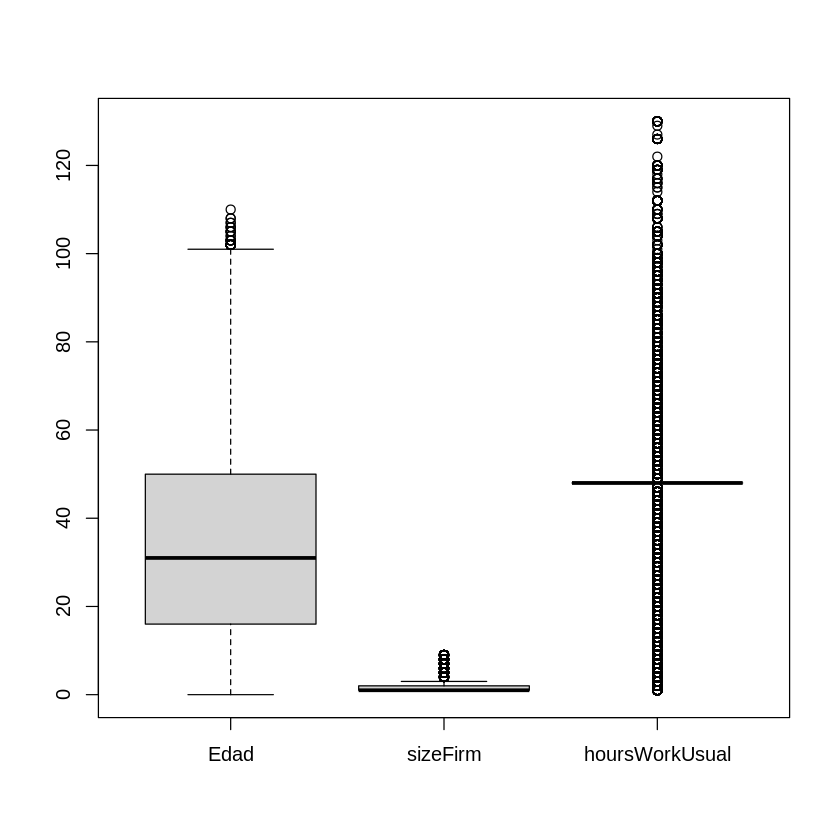

In [83]:
boxplot(train_personas[,lista_var_pers_train_discrete])

No se quitan outliers de las variables discretas, ya que, si se hace, se eliminarían todos las observaciones distintas de 48 horas de trabajo

Variables continuas

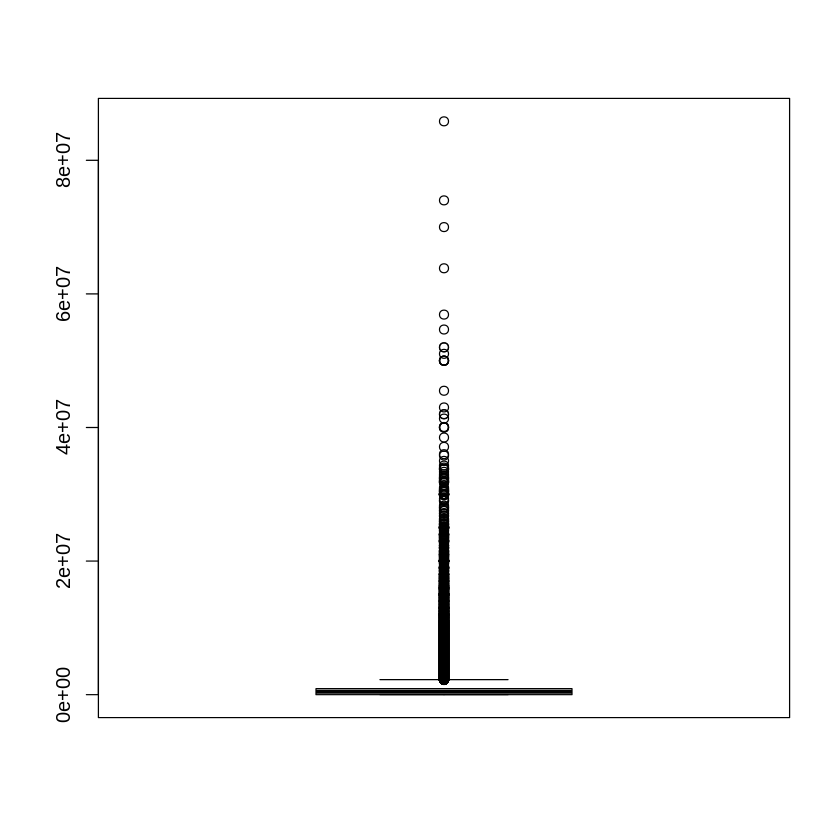

In [84]:
boxplot(train_personas[,lista_var_pers_train_continua])

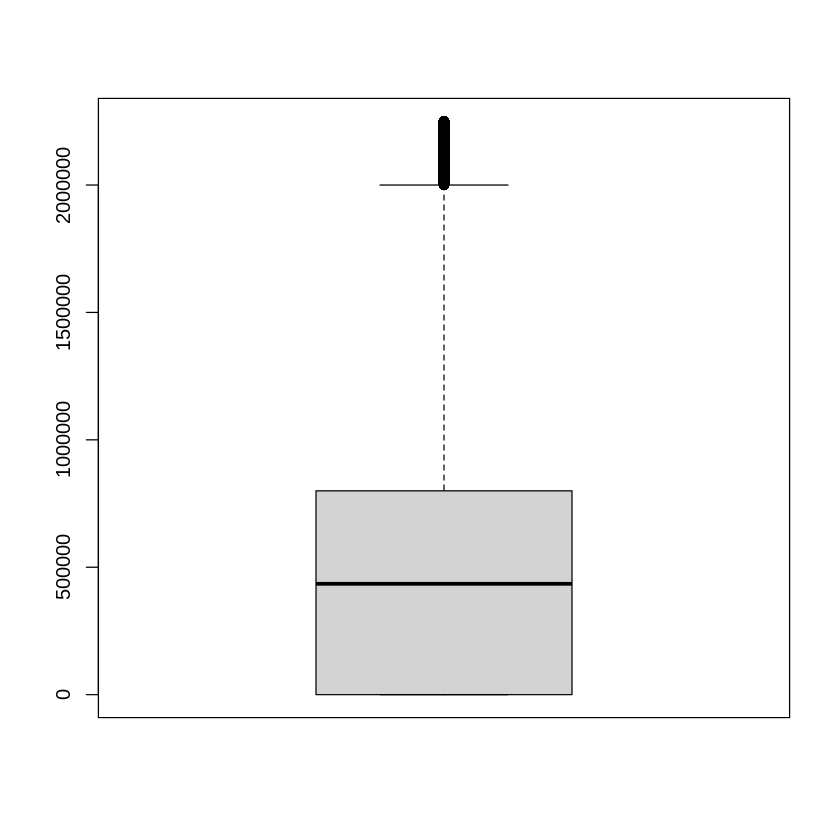

In [85]:
for (x in lista_var_pers_train_continua){

  value = train_personas[,x][train_personas[,x] %in% boxplot.stats(train_personas[,x])$out]
  train_personas[,x][train_personas[,x] %in% value] = NA

}
train_personas <- train_personas %>% drop_na()
boxplot(train_personas[,lista_var_pers_train_continua])


Exportación de **train_personas** sin outliers

In [86]:
write.csv(train_personas, file='train_personas_3.csv', row.names = FALSE)

Limpieza - Base de datos **test_personas**



In [87]:
glimpse(test_personas)

Rows: 219,644
Columns: 25
$ id                 <chr> "3279230a4917cdf883df34cd", "3279230a4917cdf883df34…
$ Sexo               <int> 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, …
$ Edad               <int> 33, 7, 37, 5, 27, 24, 51, 20, 54, 29, 1, 25, 7, 10,…
$ JefeHogar          <int> 1, 3, 2, 3, 1, 2, 2, 3, 1, 1, 3, 2, 3, 4, 3, 3, 1, …
$ FormalSalud        <int> 1, NA, 1, NA, 1, 1, 1, 1, 1, 1, NA, 1, NA, NA, 1, 1…
$ SeguridadSocial    <int> 1, NA, 1, NA, 1, 1, 1, 1, 1, 3, NA, 3, NA, NA, 1, 3…
$ maxEducLevel       <int> 6, 3, 6, 2, 5, 6, 3, 5, 3, 5, NA, 6, 3, 3, 5, 6, 3,…
$ relab              <int> 1, NA, 3, NA, 4, 1, NA, 1, 1, 4, NA, NA, NA, NA, 1,…
$ SubsAlimen         <int> 2, NA, 2, NA, NA, 2, NA, 2, 2, NA, NA, NA, NA, NA, …
$ SubsTrans          <int> 2, NA, 2, NA, NA, 2, NA, 1, 1, NA, NA, NA, NA, NA, …
$ SubsFamil          <int> 2, NA, 2, NA, NA, 2, NA, 2, 2, NA, NA, NA, NA, NA, …
$ SubsEducativo      <int> 2, NA, 2, NA, NA, 2, NA, 2, 2, NA, NA, NA, NA, NA, …
$ Viaticos    

In [88]:
summary(test_personas)

      id                 Sexo            Edad         JefeHogar  
 Length:219644      Min.   :1.000   Min.   :  0.0   Min.   :1.0  
 Class :character   1st Qu.:1.000   1st Qu.: 16.0   1st Qu.:1.0  
 Mode  :character   Median :2.000   Median : 30.0   Median :3.0  
                    Mean   :1.527   Mean   : 33.5   Mean   :2.6  
                    3rd Qu.:2.000   3rd Qu.: 50.0   3rd Qu.:3.0  
                    Max.   :2.000   Max.   :110.0   Max.   :9.0  
                                                                 
  FormalSalud    SeguridadSocial  maxEducLevel       relab       
 Min.   :1.00    Min.   :1.00    Min.   :1.000   Min.   :1.00    
 1st Qu.:1.00    1st Qu.:1.00    1st Qu.:3.000   1st Qu.:1.00    
 Median :1.00    Median :2.00    Median :4.000   Median :4.00    
 Mean   :1.07    Mean   :2.04    Mean   :4.219   Mean   :2.97    
 3rd Qu.:1.00    3rd Qu.:3.00    3rd Qu.:5.000   3rd Qu.:4.00    
 Max.   :9.00    Max.   :9.00    Max.   :9.000   Max.   :9.00    
 NA's   :3

In [ ]:
lista_var_pers_test_categ  <- c('Sexo', 'JefeHogar', 'FormalSalud', 'SeguridadSocial', 'maxEducLevel', 'relab', 'SubsAlimen', 'SubsTrans', 'SubsFamil', 'SubsEducativo', 'Viaticos', 'Bonificaciones', 'FormalPension', 'MasHoras', 'PagosExtraPensArri', 'Ayuda', 'GanancFinan')
lista_var_pers_test_categ_especial <- c('EdadTrabajo','Ocu', 'Desocu', 'Inact')
summary(test_personas[,lista_var_pers_test_categ])
summary(test_personas[,lista_var_pers_test_categ_especial])

In [ ]:
test_personas[,lista_var_pers_test_categ_especial] <- train_personas[,lista_var_pers_test_categ_especial] %>% replace(is.na(.), 0)
summary(test_personas[,lista_var_pers_test_categ_especial])

In [96]:
moda<-c()
i<-1
for (x in lista_var_pers_test_categ){

  moda[i] = mlv(na.omit(test_personas[,x]), method = "mfv")
  test_personas[,x] <- test_personas[,x] %>% replace(is.na(.), moda[i])

  i=i+1
}
print(moda)
summary(test_personas[,lista_var_pers_test_categ])

 [1] 2 3 1 3 3 4 2 2 2 2 2 2 2 2 2 2 2


      Sexo         JefeHogar    FormalSalud    SeguridadSocial  maxEducLevel  
 Min.   :1.000   Min.   :1.0   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.0   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:3.000  
 Median :2.000   Median :3.0   Median :1.000   Median :3.000   Median :4.000  
 Mean   :1.527   Mean   :2.6   Mean   :1.058   Mean   :2.259   Mean   :4.168  
 3rd Qu.:2.000   3rd Qu.:3.0   3rd Qu.:1.000   3rd Qu.:3.000   3rd Qu.:5.000  
 Max.   :2.000   Max.   :9.0   Max.   :9.000   Max.   :9.000   Max.   :9.000  
     relab         SubsAlimen      SubsTrans      SubsFamil     SubsEducativo
 Min.   :1.000   Min.   :1.000   Min.   :1.00   Min.   :1.000   Min.   :1    
 1st Qu.:4.000   1st Qu.:2.000   1st Qu.:2.00   1st Qu.:2.000   1st Qu.:2    
 Median :4.000   Median :2.000   Median :2.00   Median :2.000   Median :2    
 Mean   :3.533   Mean   :1.997   Mean   :1.91   Mean   :1.958   Mean   :2    
 3rd Qu.:4.000   3rd Qu.:2.000   3rd Qu.:2.00   3rd Qu.:2

Variables discretas

In [92]:
lista_var_pers_test_discrete  <- c('Edad', 'sizeFirm','hoursWorkUsual')
summary(test_personas[,lista_var_pers_test_discrete])

      Edad          sizeFirm      hoursWorkUsual  
 Min.   :  0.0   Min.   :1.00     Min.   :  1.00  
 1st Qu.: 16.0   1st Qu.:1.00     1st Qu.: 40.00  
 Median : 30.0   Median :2.00     Median : 48.00  
 Mean   : 33.5   Mean   :3.79     Mean   : 44.59  
 3rd Qu.: 50.0   3rd Qu.:7.00     3rd Qu.: 50.00  
 Max.   :110.0   Max.   :9.00     Max.   :130.00  
                 NA's   :119704   NA's   :119704  

In [93]:
moda<-c()
i<-1
for (x in lista_var_pers_test_discrete){

  moda[i] = mlv(na.omit(test_personas[,x]), method = "mfv")
  test_personas[,x] <- test_personas[,x] %>% replace(is.na(.), moda[i])

  i=i+1
}
print(moda)
summary(train_personas[,lista_var_pers_train_discrete])

[1] 22  1 48


      Edad           sizeFirm     hoursWorkUsual  
 Min.   :  0.00   Min.   :1.000   Min.   :  1.00  
 1st Qu.: 15.00   1st Qu.:1.000   1st Qu.: 48.00  
 Median : 29.00   Median :1.000   Median : 48.00  
 Mean   : 32.67   Mean   :2.104   Mean   : 46.57  
 3rd Qu.: 49.00   3rd Qu.:2.000   3rd Qu.: 48.00  
 Max.   :110.00   Max.   :9.000   Max.   :130.00  

Variables continuas

No hay variables continuas en la base de datos **train_personas**

In [94]:
summary(test_personas)

      id                 Sexo            Edad         JefeHogar  
 Length:219644      Min.   :1.000   Min.   :  0.0   Min.   :1.0  
 Class :character   1st Qu.:1.000   1st Qu.: 16.0   1st Qu.:1.0  
 Mode  :character   Median :2.000   Median : 30.0   Median :3.0  
                    Mean   :1.527   Mean   : 33.5   Mean   :2.6  
                    3rd Qu.:2.000   3rd Qu.: 50.0   3rd Qu.:3.0  
                    Max.   :2.000   Max.   :110.0   Max.   :9.0  
  FormalSalud    SeguridadSocial  maxEducLevel       relab      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:3.000   1st Qu.:4.000  
 Median :1.000   Median :3.000   Median :4.000   Median :4.000  
 Mean   :1.058   Mean   :2.259   Mean   :4.168   Mean   :3.533  
 3rd Qu.:1.000   3rd Qu.:3.000   3rd Qu.:5.000   3rd Qu.:4.000  
 Max.   :9.000   Max.   :9.000   Max.   :9.000   Max.   :9.000  
   SubsAlimen      SubsTrans      SubsFamil     SubsEducativo    Viaticos    
 Min.

Exportación de **test_personas** con outliers

In [95]:
write.csv(test_personas, file='test_personas_2.csv', row.names = FALSE)

Tratamiento de outliers

Variables discretas

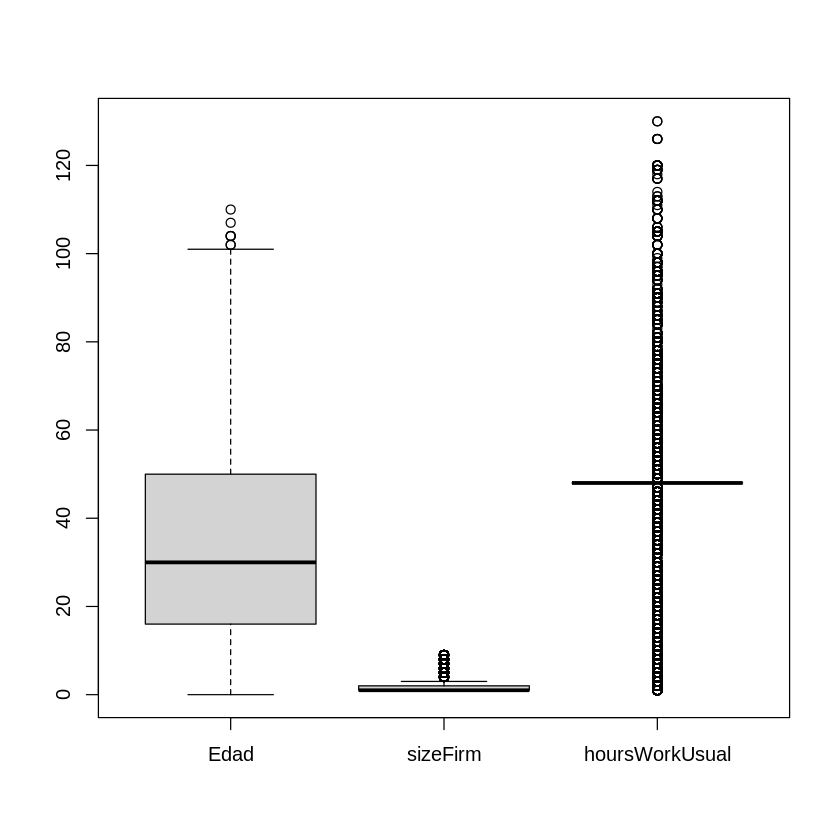

In [97]:
boxplot(test_personas[,lista_var_pers_test_discrete])

No se quitan outliers de las variables discretas, ya que, si se hace, se eliminarían todos las observaciones distintas de 48 horas de trabajo



In [98]:
write.csv(test_personas, file='test_personas_3.csv', row.names = FALSE)

In [100]:
table(train_personas$id)


00004a3f76ed8c33d84a5c70 000088edf78cfaaf1791beba 00009b13480f6770b6a4d1e9 
                       5                        3                        3 
0000b1899fb63a7bf0b73ccf 0000f3ec65ccacadfcc59f32 0001081bf03faa5ec019c393 
                       2                        3                        4 
000118206b55d57ef327dc39 00015c14c1d31e33579cfac8 0001fa4d84bf4d42c865b3d7 
                       5                        8                        4 
0002584c6e9b7440b7ba90b7 0002c275707efdc7e0c4811a 0002cc2a149eae82e50bc966 
                       4                        3                        4 
0003f8f82ca2e69af4a4e473 0004362da3dd970e6a2fd520 0005a487b33b3d674e0926dd 
                       4                        7                        7 
0005b27af79787ead7db834a 0005cb4ec865cba78e02f976 000696b9592e3fd7a3e0acf5 
                       1                        1                        3 
0006c395f1182e03f92aae0c 00078cb771ac1576487d1805 0007a4eb25fbb9dd8c2e87af 
           

In [101]:
revision<- train_personas %>% filter(id=='9f104bd5b56cb072243bb32c')
print(revision)

                        id Sexo Edad JefeHogar FormalSalud SeguridadSocial
1 9f104bd5b56cb072243bb32c    1   56         1           1               3
2 9f104bd5b56cb072243bb32c    2   35         2           1               3
3 9f104bd5b56cb072243bb32c    1   19         3           1               3
4 9f104bd5b56cb072243bb32c    1   76         5           1               3
  maxEducLevel relab SubsAlimen SubsTrans SubsFamil SubsEducativo Viaticos
1            3     4          2         2         2             2        2
2            5     4          2         2         2             2        2
3            5     4          2         2         2             2        2
4            1     4          2         2         2             2        2
  Bonificaciones hoursWorkUsual sizeFirm FormalPension MasHoras
1              2             48        1             2        2
2              2             48        1             2        2
3              2             40        1             2    